In [16]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
%load_ext autoreload
%autoreload 2

In [17]:
from ifs import *
from maps import *
from utils import *

In [18]:
def simple_demo(translations):
    sims = []
    for t in translations:
        sim = Similitude(0.5, construct_rotation_2d(0), t)
        sims.append(sim)
    return sims

In [19]:
ts = [np.array([0.0, 0.5]),np.array([0.5, -0.5]), np.array([-0.5, -0.5])]

In [20]:
demo_maps =simple_demo(ts)

In [21]:
weights = np.array([1,1,1])
weights = weights / sum(weights)

In [22]:
out = generate_ifs(demo_maps, weights, 4, 10000)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


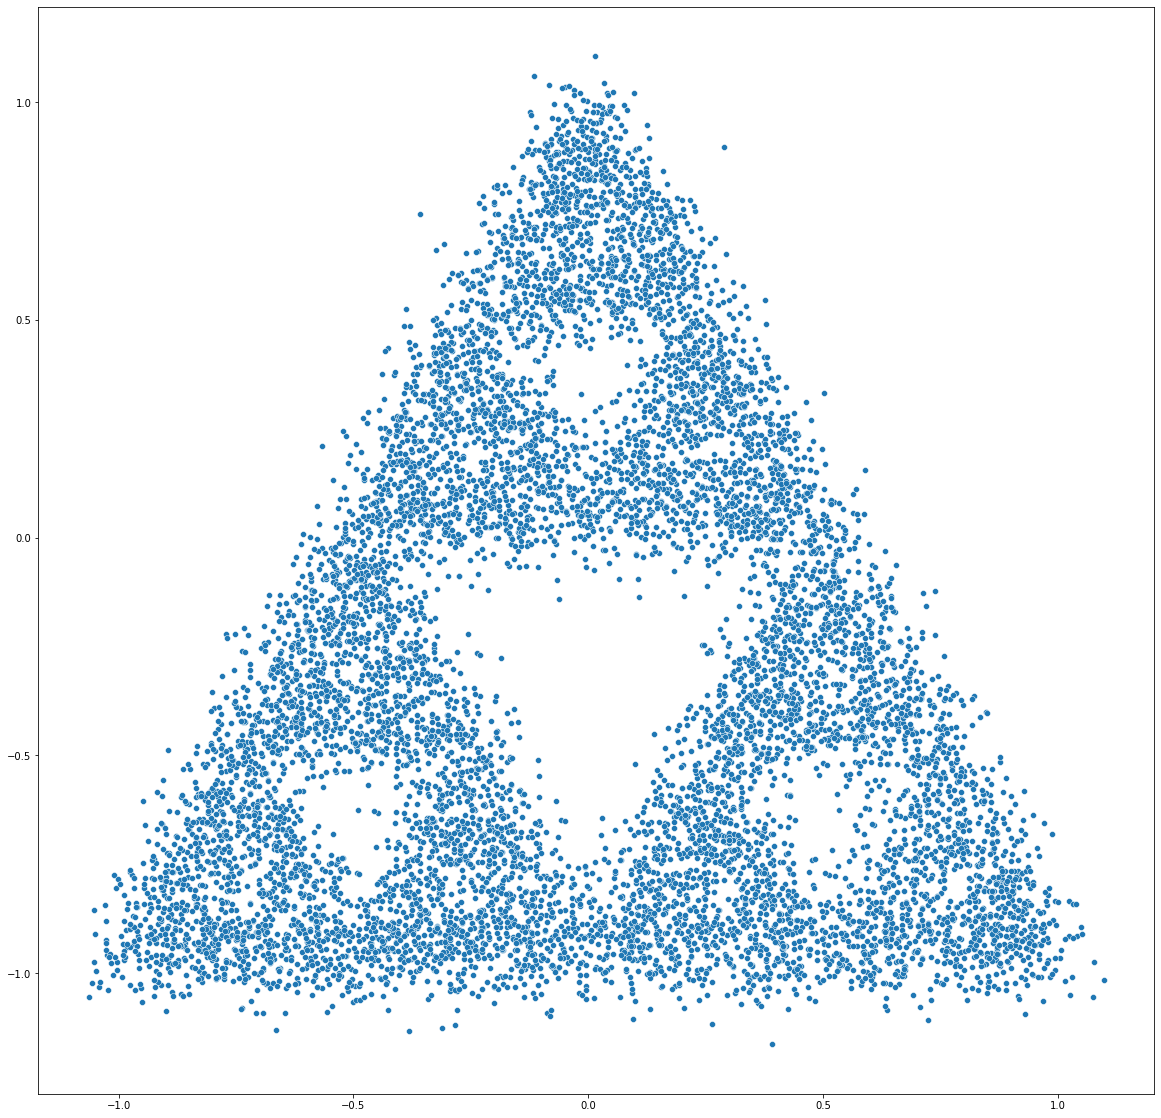

In [23]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.scatterplot(out[:,0], out[:,1])

In [107]:
from em import EM

In [225]:
model = EM(np.array(demo_maps), np.array(weights), depth = 4)

In [226]:
model.post_transform = demo_maps[0]

In [227]:
model.iter_once(out)

(2, 10000) (10000, 10000) (10000, 2)
[[5.61840226 0.         0.         ... 0.         0.         0.        ]
 [0.         5.74762294 0.         ... 0.         0.         0.        ]
 [0.         0.         5.69246122 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 6.06326637 0.         0.        ]
 [0.         0.         0.         ... 0.         5.56213668 0.        ]
 [0.         0.         0.         ... 0.         0.         3.99906131]]


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 10000)

In [200]:
p, pks, scalars, translations = model.e_step(out)

In [134]:
model.create_T(translations).shape

(2, 40)

In [201]:
p

array([[0.00084266, 0.00359731, 0.00174618, ..., 0.04506944, 0.0174913 ,
        0.02608375],
       [0.00111372, 0.00413449, 0.00255477, ..., 0.03690189, 0.0162179 ,
        0.00593403],
       [0.00091162, 0.00380802, 0.00173219, ..., 0.04604624, 0.01544438,
        0.02527163],
       ...,
       [0.00198192, 0.00567843, 0.00180376, ..., 0.04983427, 0.00078944,
        0.03932347],
       [0.00088331, 0.00354187, 0.00247089, ..., 0.03583508, 0.02126457,
        0.0095407 ],
       [0.00092088, 0.0007739 , 0.00291308, ..., 0.01468598, 0.05481364,
        0.06804606]])

In [204]:
model.depth_weights

array([2.47444788, 4.38085394, 6.6805699 , 9.11728665])

In [206]:
pks[0]

array([[0.00359731, 0.01600016, 0.00791567, ..., 0.05194078, 0.02232272,
        0.02955523],
       [0.00413449, 0.01850276, 0.01065334, ..., 0.04942676, 0.02415119,
        0.01080625],
       [0.00380802, 0.01703703, 0.00786324, ..., 0.05396011, 0.02074684,
        0.02883315],
       ...,
       [0.00567843, 0.02556387, 0.00574858, ..., 0.06595141, 0.00395672,
        0.0338575 ],
       [0.00354187, 0.01564042, 0.01050141, ..., 0.04508079, 0.02794505,
        0.01451102],
       [0.0007739 , 0.00062475, 0.0072146 , ..., 0.0074925 , 0.04171948,
        0.05101812]])

In [207]:
Z = model.create_z(0, scalars)

In [212]:
(pks[0] @ Z).shape

(10000, 13)